<a href="https://colab.research.google.com/github/stenio-fonteles/Bootcamp-Atlantico/blob/main/Atividade%2001(trailhead).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
import nltk
import pandas as pd
import numpy as np
import re
import codecs
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')

In [3]:
input_file = codecs.open('./socialmedia_relevant_cols.csv', 'r', encoding='utf-8', errors='replace')
output_file = open('./socialmedia_relevant_cols_decoded.csv', 'w')

def sanitize_characters(raw, clean):    
    for line in input_file:
        out = line
        output_file.write(line)
        
sanitize_characters(input_file, output_file)

input_file.close()
output_file.close()

In [4]:
tweet_db = pd.read_csv('./socialmedia_relevant_cols_decoded.csv')

tweet_db.head(10)

,text,choose_one,class_label
0,Just happened a terrible car crash,Relevant,1
1,Our Deeds are the Reason of this #earthquake M...,Relevant,1
2,"Heard about #earthquake is different cities, s...",Relevant,1
3,"there is a forest fire at spot pond, geese are...",Relevant,1
4,Forest fire near La Ronge Sask. Canada,Relevant,1
5,All residents asked to 'shelter in place' are ...,Relevant,1
6,"13,000 people receive #wildfires evacuation or...",Relevant,1
7,Just got sent this photo from Ruby #Alaska as ...,Relevant,1
8,#RockyFire Update => California Hwy. 20 closed...,Relevant,1
9,Apocalypse lighting. #Spokane #wildfires,Relevant,1


In [7]:
def standardize_text(df, text_field):
    df[text_field] = df[text_field].str.replace(r"http\S+", "")
    df[text_field] = df[text_field].str.replace(r"http", "")
    df[text_field] = df[text_field].str.replace(r"@\S+", "")
    df[text_field] = df[text_field].str.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]", " ")
    df[text_field] = df[text_field].str.replace(r"@", "at")
    df[text_field] = df[text_field].str.lower()
    return df

tweet_db_clean = standardize_text(tweet_db, "text")

tweet_db_clean.to_csv("socialmedia_relevant_cols_clean.csv")
tweet_db_clean.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """


,text,choose_one,class_label
0,just happened a terrible car crash,Relevant,1
1,our deeds are the reason of this earthquake m...,Relevant,1
2,"heard about earthquake is different cities, s...",Relevant,1
3,"there is a forest fire at spot pond, geese are...",Relevant,1
4,forest fire near la ronge sask canada,Relevant,1
5,all residents asked to 'shelter in place' are ...,Relevant,1
6,"13,000 people receive wildfires evacuation or...",Relevant,1
7,just got sent this photo from ruby alaska as ...,Relevant,1
8,rockyfire update california hwy 20 closed...,Relevant,1
9,apocalypse lighting spokane wildfires,Relevant,1


In [8]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

tweet_db_clean["tokens"] = tweet_db_clean["text"].apply(tokenizer.tokenize)
tweet_db_clean.head()

,text,choose_one,class_label,tokens
0,just happened a terrible car crash,Relevant,1,"[just, happened, a, terrible, car, crash]"
1,our deeds are the reason of this earthquake m...,Relevant,1,"[our, deeds, are, the, reason, of, this, earth..."
2,"heard about earthquake is different cities, s...",Relevant,1,"[heard, about, earthquake, is, different, citi..."
3,"there is a forest fire at spot pond, geese are...",Relevant,1,"[there, is, a, forest, fire, at, spot, pond, g..."
4,forest fire near la ronge sask canada,Relevant,1,"[forest, fire, near, la, ronge, sask, canada]"


In [9]:
all_words = [word for tokens in tweet_db_clean["tokens"] for word in tokens] # add all words to a list
tweet_lengths = [len(tokens) for tokens in tweet_db_clean["tokens"]] # count lengths of tokenized tweets
vocab = sorted(list(set(all_words))) # list of unique words
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(vocab)))
print("Max sentence length is %s" % max(tweet_lengths))

154724 words total, with a vocabulary size of 18101
Max sentence length is 34


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


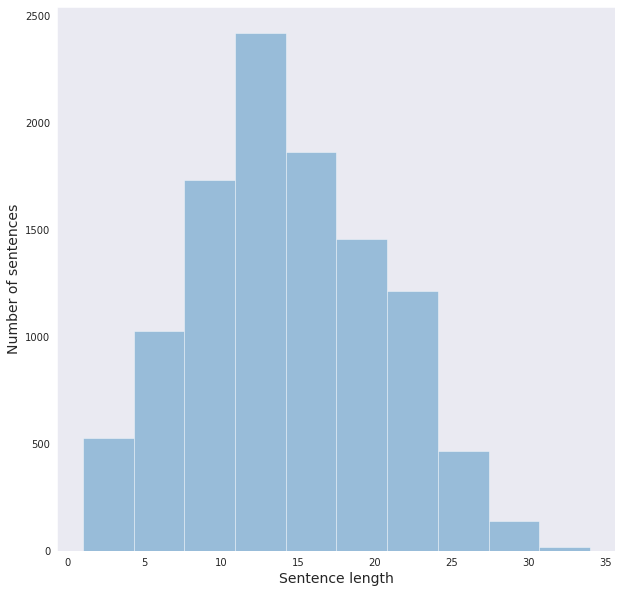

In [10]:
fig = plt.figure(figsize=(10, 10)) 
sns.distplot(tweet_lengths, kde=False, bins=10)
plt.xlabel('Sentence length', fontsize=14)
plt.ylabel('Number of sentences', fontsize=14)
plt.show()